## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### Avaliação de Agrupamento de Dados - Demo 2

* Utilização do algoritmo K-means com diferentes parâmetros.
* Base de dados sintéticas
* Comparações das diferentes execuções usando índice de avaliação externo.

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from sklearn.metrics import adjusted_rand_score

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


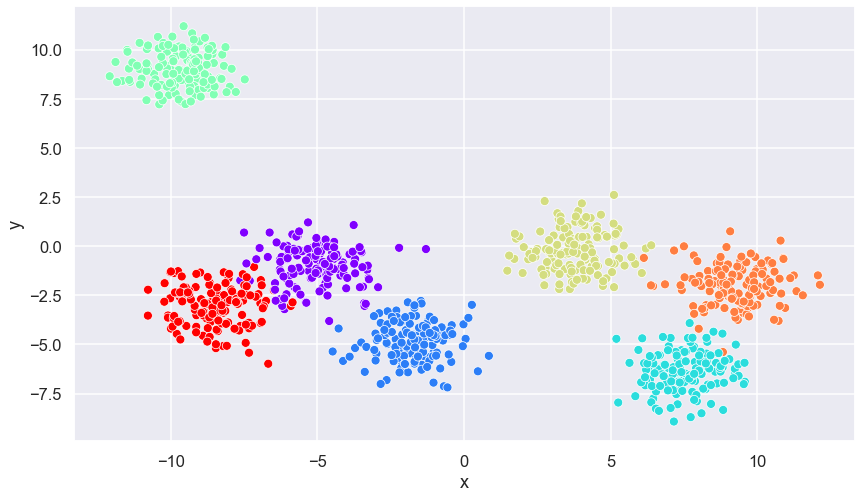

In [3]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### Testar K-Means

In [4]:
def train_and_plot(data, k=3, init='k-means++', n_init=10, max_iter=300,
                   precompute_distances='auto', algorithm='auto', verbose=0, random_state=133):
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter,
                   precompute_distances=precompute_distances, algorithm=algorithm,
                   random_state=random_state, verbose=verbose)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.labels_
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

    centroids = model.cluster_centers_
    centroids_x = centroids[:,0]
    centroids_y = centroids[:,1]

    _ = plt.scatter(centroids_x, centroids_y, color='black', s=100)
    
    return model, model.labels_

### Exemplo de Índice Externo

#### Adjusted Rand Index

Com número correto de clusters, onde grupos resultantes são bastante similares ao ground truth.

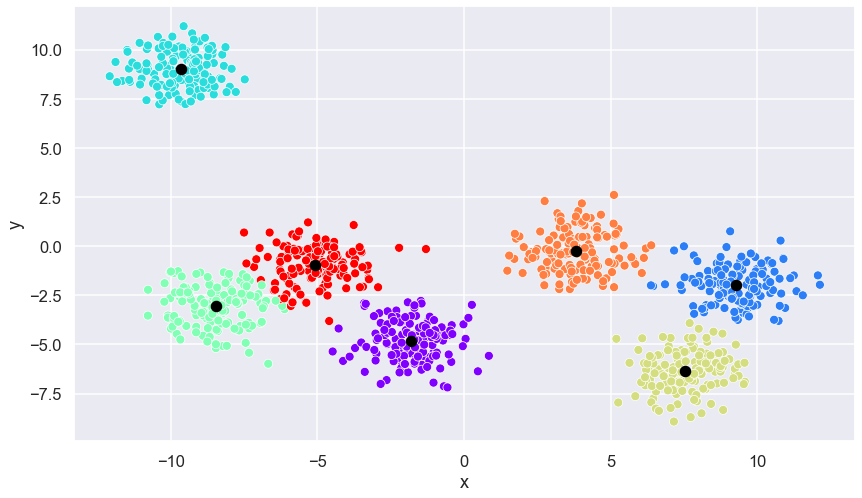

In [5]:
_, clusters_labels = train_and_plot(df, k=7)

In [6]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.9637


Com inicialização aleatória, onde grupos resultantes são menos similares ao ground truth.

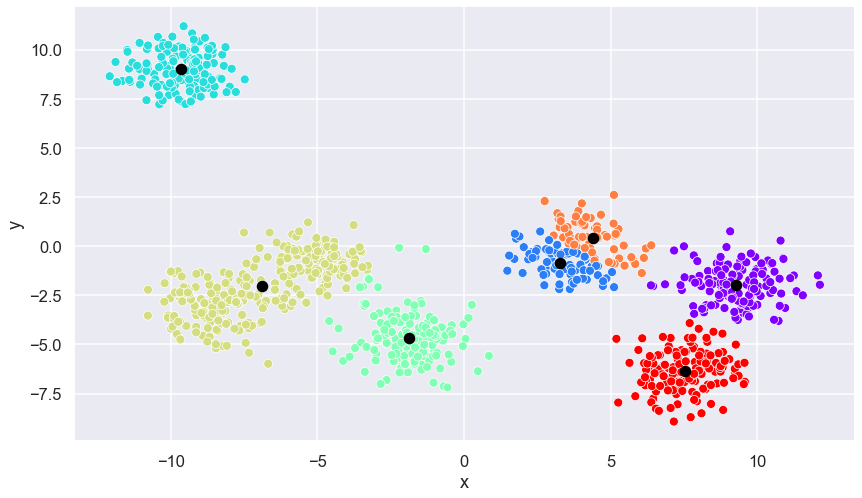

In [7]:
_, clusters_labels = train_and_plot(df, k=7, init='random', random_state=400)

In [8]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.7899


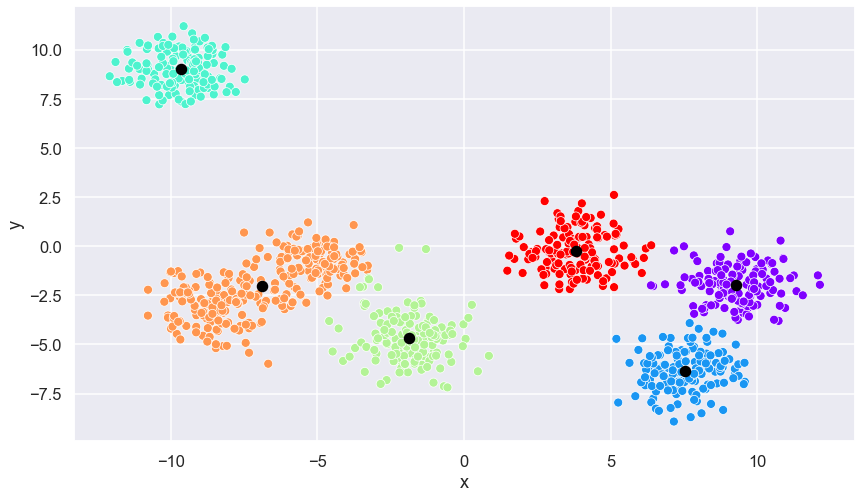

In [9]:
_, clusters_labels = train_and_plot(df, k=6, init='random', random_state=400)

In [10]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.8327


Com número de grupos incorreto, onde a quantidade de grupos resultantes é menor do que a quantidade de grupos real.

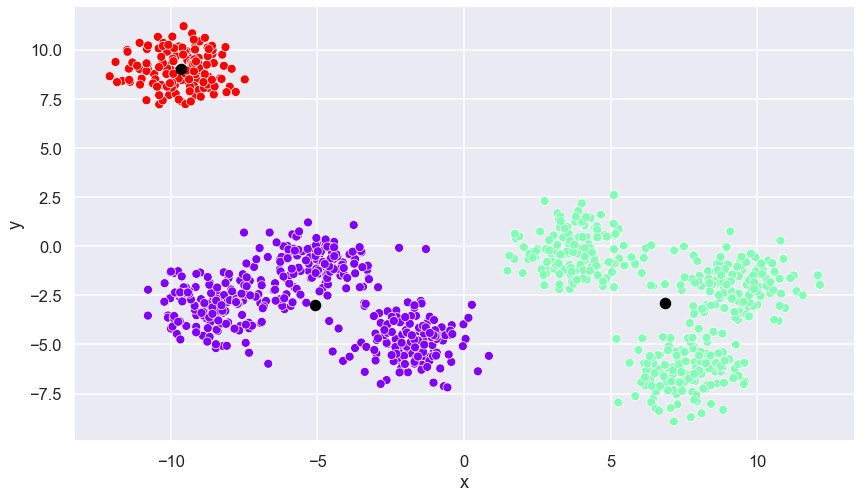

In [11]:
_, clusters_labels = train_and_plot(df, k=3)

In [12]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.4153


Com número de grupos incorreto, onde a quantidade de grupos resultantes é maior do que a quantidade de grupos real.

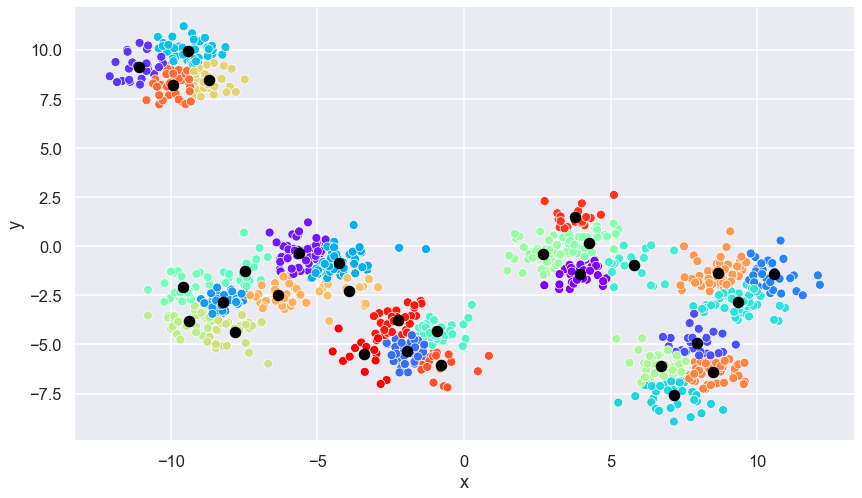

In [13]:
_, clusters_labels = train_and_plot(df, k=30)

In [14]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.36


#### Testes de plot com o índice
Pode ser muito útil ver um gráfico do índice variando pelo número de clusters

In [15]:
%%time

def do_ajusted_random_index_and_plot(data, max_clusters):
    min_clusters = 1

    clusters_range = range(min_clusters, max_clusters + 1)

    aris = []
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)

    for k in clusters_range:
        model = KMeans(n_clusters=k, random_state=33)
        model.fit(data_copy)
        
        #ARI = Ajusted Random Index :)
        ari = adjusted_rand_score(y, model.labels_)
        aris.append(ari)
        
    _ = plt.plot(clusters_range, aris, '-o')
    _ = plt.title('Ajusted Random Index x Número de Clusters')
    _ = plt.xlabel('Número de clusters')
    _ = plt.ylabel('Ajusted Random Index')
    _ = plt.xticks(clusters_range)
    plt.show()

Wall time: 0 ns


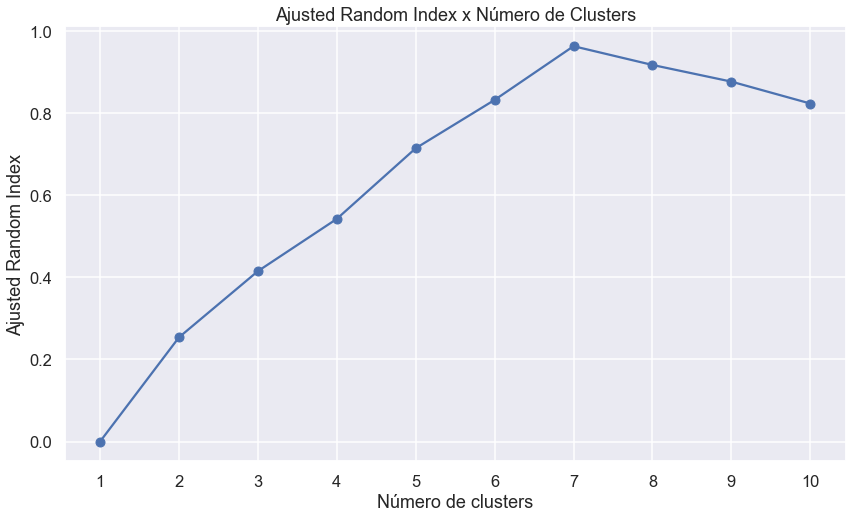

In [16]:
do_ajusted_random_index_and_plot(df, max_clusters=10)

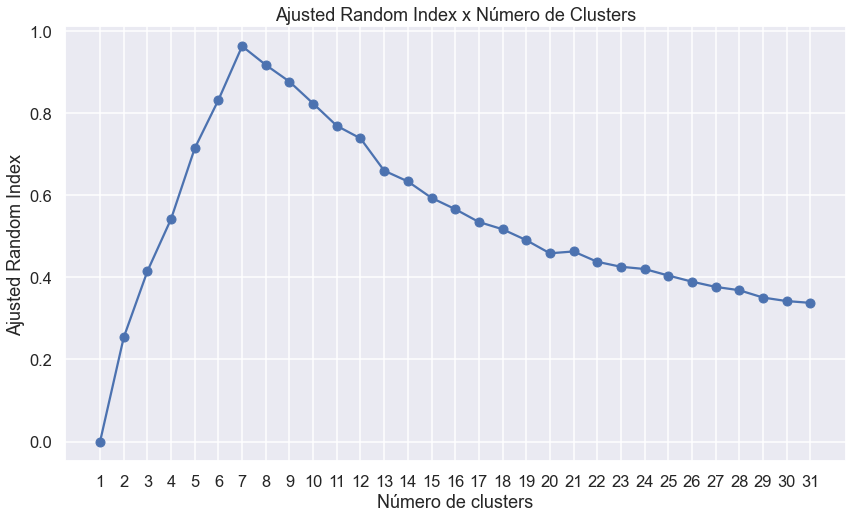

In [17]:
do_ajusted_random_index_and_plot(df, max_clusters=int(np.sqrt(len(df))))

### Execução com base de dados de 1M de registros

In [18]:
X, y = make_blobs(n_samples=1000000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])

df.head()

,x,y
0,-9.507284,7.336711
1,-5.079856,-2.823110
2,-2.155830,-5.106045
3,1.812118,-0.337578
4,8.453084,-5.795128


In [19]:
start = time.time()
model = KMeans(n_clusters=7, algorithm='full', random_state=33)
model.fit(df)
print(time.time() - start)

21.41388964653015


In [20]:
print('Ajusted Random Index:', round(adjusted_rand_score(y, model.labels_), 4))

Ajusted Random Index: 0.9707


## Algumas limitações
Resultados da avaliação de execuções onde o K-means é limitado.

In [21]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


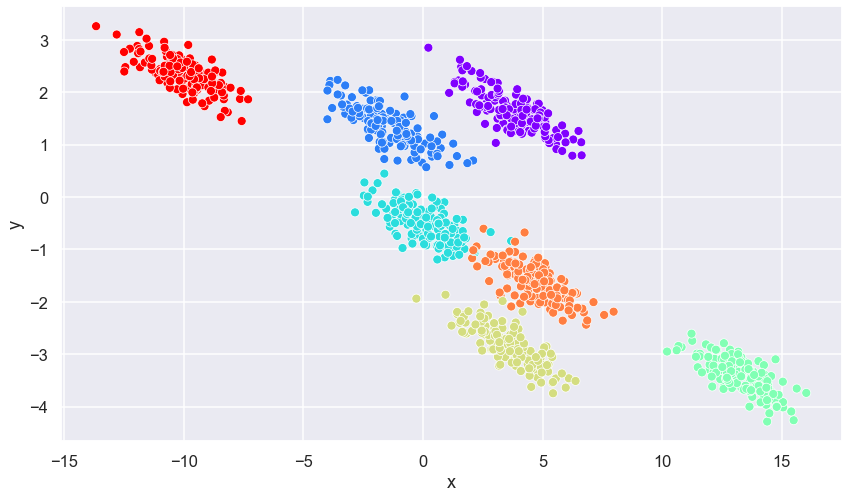

In [22]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

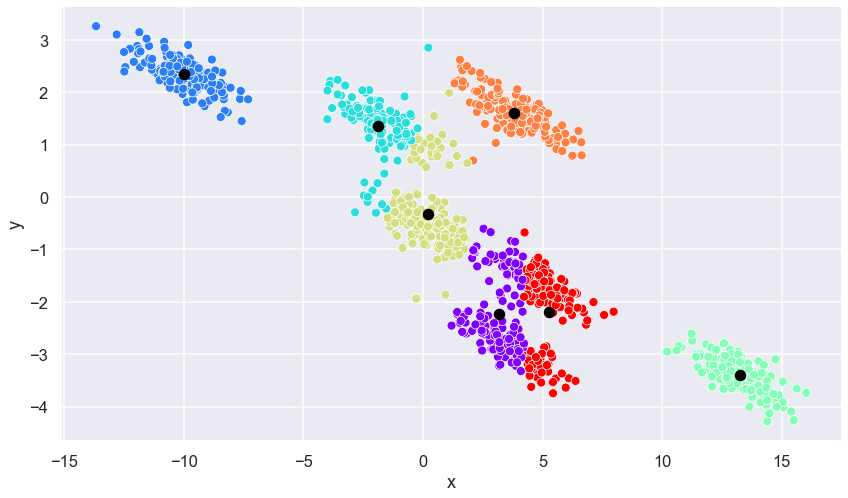

In [23]:
_, clusters_labels = train_and_plot(df_transformed, k=7)

In [24]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.7677


### Avaliando em bases de dados com formatos diferentes de grupos

In [25]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

,x,y,label
0,0.449533,-0.403077,1
1,1.860595,0.011092,1
2,1.842407,-0.086292,1
3,1.395956,-0.438878,1
4,0.479125,0.926415,0


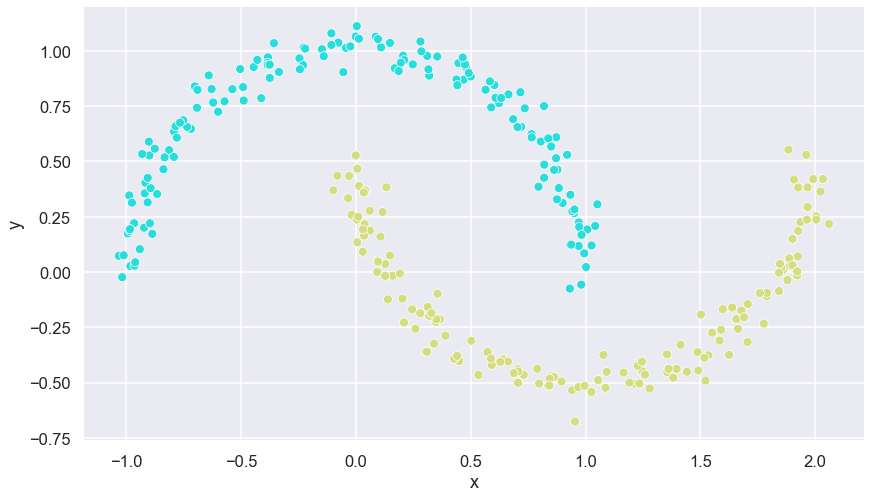

In [26]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

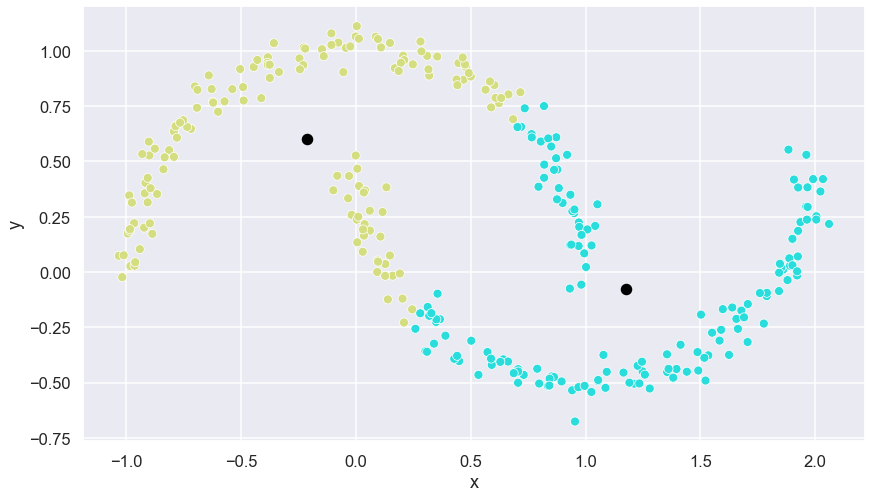

In [29]:
_, clusters_labels = train_and_plot(df_moon, k=2)

In [30]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.268
